In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import preprocessing


#libraries for model performance evaluation
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score

#libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.colors import ListedColormap

# libraries for computation
import pandas as pd
import numpy as np

#library for train test split
from sklearn.model_selection import train_test_split,cross_val_score,KFold

#library for preprocessing
from sklearn.preprocessing import StandardScaler

#library for Dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

#Library for feature selection techniques
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectFromModel

#libraries for various ML models 
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
#ensemble models
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor



#libraries for model performance evaluation
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score

#libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings('ignore')

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### Read Data from CSV

In [3]:
data = pd.read_csv('Gdp-Per-Capita.csv')

In [4]:
data.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2017,1980.516177,NaN
1,Afghanistan,2016,1944.117005,NaN
2,Afghanistan,2015,1926.357336,NaN
3,Afghanistan,2014,1937.235365,NaN
4,Afghanistan,2013,1913.160644,NaN


#### lets drop extra column Value Footnotes

In [5]:
# Read data from csv and print the head
data = data.drop(columns=['Value Footnotes'])
data.head(5)

,Country or Area,Year,Value
0,Afghanistan,2017,1980.516177
1,Afghanistan,2016,1944.117005
2,Afghanistan,2015,1926.357336
3,Afghanistan,2014,1937.235365
4,Afghanistan,2013,1913.160644


#### Get data insights

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6412 entries, 0 to 6411
Data columns (total 3 columns):
Country or Area    6412 non-null object
Year               6412 non-null object
Value              6410 non-null float64
dtypes: float64(1), object(2)
memory usage: 150.4+ KB


#### it seems column Value has some missing values or NaN 

In [7]:
vals = data['Value']

In [8]:
d = data[ vals.isna() ]
d

,Country or Area,Year,Value
6410,footnoteSeqID,Footnote,NaN
6411,2,"Excludes South Sudan after July 9, 2011.",NaN


##### lets drop this entries

In [9]:
data  = data [0:6410] 

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6410 entries, 0 to 6409
Data columns (total 3 columns):
Country or Area    6410 non-null object
Year               6410 non-null object
Value              6410 non-null float64
dtypes: float64(1), object(2)
memory usage: 150.3+ KB


### Lets normalize data

In [11]:
# Normalize the value column and drop old column

# Create x, where x the 'Value' column's values as floats
x = data[['Value']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized = pd.DataFrame(x_scaled)
df_normalized['normalized'] = pd.DataFrame(x_scaled)
df_normalized.drop(columns=0,inplace=True)

data_new = pd.concat([data,df_normalized ], axis=1)
data_new.drop(columns='Value',inplace=True)

In [12]:
# Check new dataframe with normalized value
data_new.head()

,Country or Area,Year,normalized
0,Afghanistan,2017,0.012871
1,Afghanistan,2016,0.012611
2,Afghanistan,2015,0.012484
3,Afghanistan,2014,0.012562
4,Afghanistan,2013,0.012390


#### Using tsfresh to extract features from data

In [13]:
# Use TSFresh library to extract features from data 
from tsfresh import extract_features
extracted_features = extract_features(data_new, column_id="Country or Area", column_sort="Year")

Feature Extraction: 100%|██████████| 10/10 [00:26<00:00,  2.41s/it]


In [14]:
#Check extracted features
extracted_features.head()

variable,normalized__abs_energy,normalized__absolute_sum_of_changes,"normalized__agg_autocorrelation__f_agg_""mean""","normalized__agg_autocorrelation__f_agg_""median""","normalized__agg_autocorrelation__f_agg_""var""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""intercept""",...,normalized__time_reversal_asymmetry_statistic__lag_1,normalized__time_reversal_asymmetry_statistic__lag_2,normalized__time_reversal_asymmetry_statistic__lag_3,normalized__value_count__value_-inf,normalized__value_count__value_0,normalized__value_count__value_1,normalized__value_count__value_inf,normalized__value_count__value_nan,normalized__variance,normalized__variance_larger_than_standard_deviation
id,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.001506,0.008149,-0.560092,-0.724930,0.859690,0.010585,1.000000,0.002286,0.000000,NaN,...,1.838042e-07,4.120255e-07,6.967001e-07,0.0,0.0,0.0,0.0,0.0,0.000009,0.0
Albania,0.069468,0.082093,-0.567407,-0.613312,0.924952,0.027381,0.991305,0.029781,0.003953,NaN,...,2.912524e-05,5.916822e-05,8.838382e-05,0.0,0.0,0.0,0.0,0.0,0.000604,0.0
Algeria,0.155772,0.064941,-0.584715,-0.680767,0.978198,0.055719,0.993629,0.026990,0.003061,NaN,...,5.783564e-05,1.154399e-04,1.721140e-04,0.0,0.0,0.0,0.0,0.0,0.000460,0.0
Angola,0.024302,0.043208,-0.477912,-0.785836,0.699591,0.017863,0.945747,0.015688,0.005389,NaN,...,4.374484e-06,1.000079e-05,1.569562e-05,0.0,0.0,0.0,0.0,0.0,0.000182,0.0
Antigua and Barbuda,0.417158,0.176575,-0.555487,-0.726871,0.896581,0.109391,0.885293,0.034195,0.017962,NaN,...,2.037950e-04,3.720508e-04,5.182454e-04,0.0,0.0,0.0,0.0,0.0,0.000869,0.0


In [15]:
#Check shape of new data with extracted features
extracted_features.shape

(241, 794)

In [16]:
#Check if any columns contains Nan values (null values)
list_cols_with_nan = extracted_features.columns[extracted_features.isna().any()].tolist()
len(list_cols_with_nan)

548

In [17]:
# it seems 548 columns out of 794 have some null values

In [18]:
#lets replace nan value with 0.0
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute
data_after_impute = impute(extracted_features)

 'normalized__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"rvalue"'
 'normalized__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"slope"'
 'normalized__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"stderr"'
 'normalized__agg_linear_trend__f_agg_"mean"__chunk_len_50__attr_"intercept"'
 'normalized__agg_linear_trend__f_agg_"mean"__chunk_len_50__attr_"rvalue"'
 'normalized__agg_linear_trend__f_agg_"mean"__chunk_len_50__attr_"slope"'
 'normalized__agg_linear_trend__f_agg_"mean"__chunk_len_50__attr_"stderr"'
 'normalized__agg_linear_trend__f_agg_"min"__chunk_len_50__attr_"intercept"'
 'normalized__agg_linear_trend__f_agg_"min"__chunk_len_50__attr_"rvalue"'
 'normalized__agg_linear_trend__f_agg_"min"__chunk_len_50__attr_"slope"'
 'normalized__agg_linear_trend__f_agg_"min"__chunk_len_50__attr_"stderr"'
 'normalized__agg_linear_trend__f_agg_"var"__chunk_len_50__attr_"intercept"'
 'normalized__agg_linear_trend__f_agg_"var"__chunk_len_50__attr_"rvalue"'
 'normalized__agg_linear_tre

In [19]:
#lets check if any column has any nan value
list_cols_with_nan_after_impute = data_after_impute.columns[data_after_impute.isna().any()].tolist()
len(list_cols_with_nan_after_impute)

0

In [20]:
#we dont have any nan values 
# lets reset the index
data_after_impute = data_after_impute.reset_index()

In [21]:
# we need to give labels to countries 
data_countries = pd.read_excel('Developing countries.xlsx')

developed_countries = data_countries [data_countries['Value'] == 0]
developing_countries = data_countries [data_countries['Value'] == 1] 

list_developed_countries = developed_countries['Countries']
list_developing_countries = developing_countries['Countries']

list_developed_countries = list(list_developed_countries)
list_developing_countries = list(list_developing_countries)

data_after_impute['label'] = -1

for i,da in data_after_impute.iterrows():
    if da['id'] in list_developed_countries:
        val = 0
        data_after_impute.at[i,'label'] = val
    elif da['id'] in list_developing_countries:
        val = 1
        data_after_impute.at[i,'label'] = val

In [22]:
# check new df with added column as label 
data_after_impute.head()

variable,id,normalized__abs_energy,normalized__absolute_sum_of_changes,"normalized__agg_autocorrelation__f_agg_""mean""","normalized__agg_autocorrelation__f_agg_""median""","normalized__agg_autocorrelation__f_agg_""var""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""",...,normalized__time_reversal_asymmetry_statistic__lag_2,normalized__time_reversal_asymmetry_statistic__lag_3,normalized__value_count__value_-inf,normalized__value_count__value_0,normalized__value_count__value_1,normalized__value_count__value_inf,normalized__value_count__value_nan,normalized__variance,normalized__variance_larger_than_standard_deviation,label
0,Afghanistan,0.001506,0.008149,-0.560092,-0.724930,0.859690,0.010585,1.000000,0.002286,0.000000,...,4.120255e-07,6.967001e-07,0.0,0.0,0.0,0.0,0.0,0.000009,0.0,-1
1,Albania,0.069468,0.082093,-0.567407,-0.613312,0.924952,0.027381,0.991305,0.029781,0.003953,...,5.916822e-05,8.838382e-05,0.0,0.0,0.0,0.0,0.0,0.000604,0.0,-1
2,Algeria,0.155772,0.064941,-0.584715,-0.680767,0.978198,0.055719,0.993629,0.026990,0.003061,...,1.154399e-04,1.721140e-04,0.0,0.0,0.0,0.0,0.0,0.000460,0.0,1
3,Angola,0.024302,0.043208,-0.477912,-0.785836,0.699591,0.017863,0.945747,0.015688,0.005389,...,1.000079e-05,1.569562e-05,0.0,0.0,0.0,0.0,0.0,0.000182,0.0,1
4,Antigua and Barbuda,0.417158,0.176575,-0.555487,-0.726871,0.896581,0.109391,0.885293,0.034195,0.017962,...,3.720508e-04,5.182454e-04,0.0,0.0,0.0,0.0,0.0,0.000869,0.0,-1


In [23]:
#Split data into X(features),y 
y = data_after_impute['label']
X = data_after_impute.drop(columns=['id','label'])

In [24]:
y.value_counts()

-1    113
 1     93
 0     35
Name: label, dtype: int64

In [25]:
# train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

In [26]:
y_train.value_counts()

-1    62
 1    60
 0    22
Name: label, dtype: int64

#### Lets try different classifiers on the data

##### KNN

In [27]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
dsf = classification_report(y_test,pred)
acc = accuracy_score(y_test,pred) 
print(dsf)
print('Accuracy is: ',acc)

             precision    recall  f1-score   support

         -1       0.69      0.61      0.65        51
          0       0.45      0.69      0.55        13
          1       0.56      0.55      0.55        33

avg / total       0.61      0.60      0.60        97

Accuracy is:  0.5979381443298969


###### KNN with k ranging from 1 to 15

[0.4845360824742268, 0.5051546391752577, 0.4845360824742268, 0.5154639175257731, 0.5257731958762887, 0.5567010309278351, 0.5567010309278351, 0.5670103092783505, 0.5154639175257731, 0.5979381443298969, 0.4845360824742268, 0.5257731958762887, 0.5257731958762887, 0.5154639175257731, 0.5876288659793815]


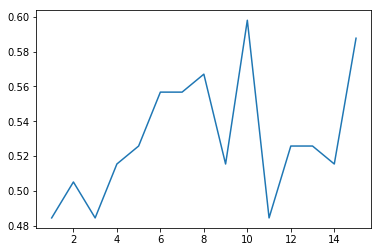

In [28]:
#KNN for different k values
kVals = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
scores = []

for k in kVals:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test,pred))
    
plt.plot(kVals,scores)    
print(scores)  

#### Random Forest Classifier

In [29]:
rf_classifier = RandomForestClassifier(n_estimators=10, random_state = 42)
rf_classifier.fit(X_train,y_train)
pred = rf_classifier.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.6283595586905407
Accuracy Score:  0.6288659793814433


#### Fine tuninng Random Forest for different number of estimators

5-------0.565420793482398
10-------0.6283595586905407
15-------0.6687063595262239
20-------0.6367930063450407
30-------0.6269846548529621
35-------0.6584890751052062
40-------0.6486908482663484
45-------0.6482264239747292
50-------0.6587615963253035
100-------0.6154571145524359
200-------0.6575491074312605
300-------0.6791899882495246


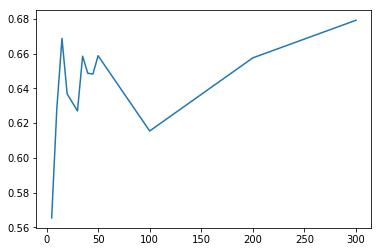

In [30]:
#Ensemble Random Forest Classifier Fine Tunning
estimators = [5,10,15,20,30,35,40,45,50,100,200,300]
f1_scores = []
for e in estimators:
    rf_classifier = RandomForestClassifier(n_estimators=e, random_state = 42)
    rf_classifier.fit(X_train,y_train)
    pred = rf_classifier.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(estimators,f1_scores) 
for i in range (0,len(estimators)):
    print(str(estimators[i]) + "-------" + str(f1_scores[i]))

#### Lets fine tune for number of features with best number of estimator from above analysis

In [31]:
rf_classifier = RandomForestClassifier(n_estimators=45, random_state = 42)
rf_classifier.fit(X_train,y_train)
pred = rf_classifier.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.6482264239747292
Accuracy Score:  0.6494845360824743


[0.6254131110343808, 0.6352435304018514, 0.6575491074312605, 0.6139138161631861, 0.6154863251344012, 0.604865327411271, 0.6797023346255737, 0.7034638265016683, 0.6588904496473402, 0.5970723163365083, 0.6173308220988634]


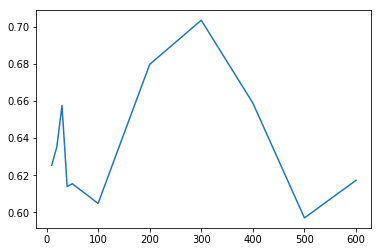

In [32]:
no_of_features = [10,20,30,40,50,100,200,300,400,500,600]
f1_scores = []
for e in no_of_features:
    rf_classifier = RandomForestClassifier(max_features = e ,n_estimators=30,random_state = 42)
    rf_classifier.fit(X_train,y_train)
    pred = rf_classifier.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(no_of_features,f1_scores) 
print(f1_scores)

#### Logistic regression model

In [33]:
#Logistic Regression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
pred = logmodel.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.631673305238469
Accuracy Score:  0.6288659793814433


#### Extra tree classifier

In [34]:
#ExtraTreeClassifier
model = ExtraTreesClassifier(n_estimators=5,random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.6506828767918661
Accuracy Score:  0.6494845360824743


[0.6506828767918661, 0.575954898375839, 0.5747985792255046, 0.5935483248929181, 0.6007358467805544, 0.6224874033795132, 0.6088194108239736, 0.5835927388762441, 0.5907634397037811, 0.6240125853527916, 0.6463071363751564, 0.6357374225837932]


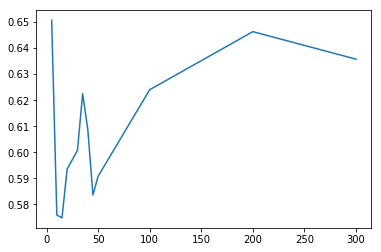

In [35]:
estimators = [5,10,15,20,30,35,40,45,50,100,200,300]
f1_scores = []
for e in estimators:
    model = ExtraTreesClassifier(n_estimators=e,random_state=42)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(estimators,f1_scores) 
print(f1_scores)

In [36]:
model = ExtraTreesClassifier(n_estimators=20,random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.5935483248929181
Accuracy Score:  0.5979381443298969


#### fine tune for max_features

[0.5834163665959651, 0.6030006932636159, 0.6063144329896907, 0.6866243721913825, 0.6792498738375027, 0.6094389489734149, 0.6668563395367519, 0.6051082826939163, 0.6786969445255936, 0.6664023261961406, 0.6565567074883525]


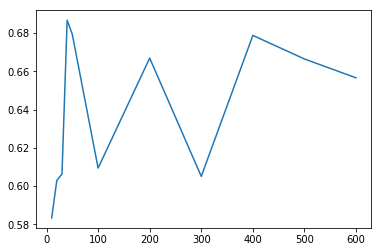

In [37]:
no_of_features = [10,20,30,40,50,100,200,300,400,500,600]
f1_scores = []
for e in no_of_features:
    model = ExtraTreesClassifier(max_features=e,n_estimators=20,random_state=42)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(no_of_features,f1_scores) 
print(f1_scores)

#### Recursive Feature Elimination 

In [38]:
# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(X_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

Optimal number of features : 44
Best features : Index(['normalized__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_5__w_2',
       'normalized__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_5__w_20',
       'normalized__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_6__w_2',
       'normalized__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_6__w_20',
       'normalized__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_6__w_5',
       'normalized__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_7__w_2',
       'normalized__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_7__w_20',
       'normalized__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_7__w_5',
       'normalized__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_8__w_10',
       'normalized__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_8__w_2',
       'normalized__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_8__w_5',
       'normalized__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_9__w_20',
       'normalized__cwt_coefficient

In [39]:
cols = X_train.columns[rfecv.support_]

In [40]:
X = X[cols]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

In [42]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
dsf = classification_report(y_test,pred)
acc = accuracy_score(y_test,pred) 
print(dsf)
print('Accuracy is: ',acc)

             precision    recall  f1-score   support

         -1       0.60      0.65      0.62        51
          0       0.42      0.38      0.40        13
          1       0.53      0.48      0.51        33

avg / total       0.55      0.56      0.55        97

Accuracy is:  0.5567010309278351


[0.5051546391752577, 0.5154639175257731, 0.5567010309278351, 0.5567010309278351, 0.5567010309278351, 0.5876288659793815, 0.5670103092783505, 0.6082474226804123, 0.5567010309278351, 0.5567010309278351, 0.5360824742268041, 0.5257731958762887, 0.5257731958762887, 0.5051546391752577, 0.5567010309278351]


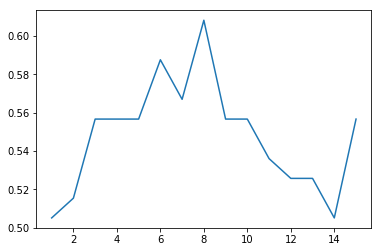

In [43]:
#KNN for different k values
kVals = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
scores = []

for k in kVals:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test,pred))
    
plt.plot(kVals,scores)    
print(scores) 

[0.6309019972611942, 0.6258652430044181, 0.584767688582809, 0.5969645615882023, 0.6075865310603288, 0.6483195223322141, 0.6824289423968188, 0.6401924800491037, 0.6300534260638221, 0.6819259700619518, 0.6697632631740915, 0.6694587628865979]


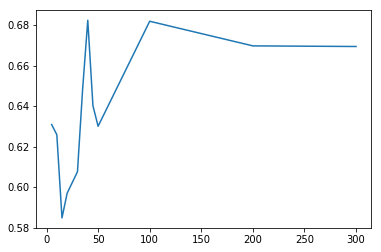

In [44]:
#Ensemble Random Forest Classifier Fine Tunning
estimators = [5,10,15,20,30,35,40,45,50,100,200,300]
f1_scores = []
for e in estimators:
    rf_classifier = RandomForestClassifier(n_estimators=e, random_state = 42)
    rf_classifier.fit(X_train,y_train)
    pred = rf_classifier.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(estimators,f1_scores) 
print(f1_scores)

In [45]:
rf_classifier = RandomForestClassifier(n_estimators=30, random_state = 42)
rf_classifier.fit(X_train,y_train)
pred = rf_classifier.predict(X_test)
dsf = classification_report(y_test,pred)
acc = accuracy_score(y_test,pred) 
print(dsf)
print('Accuracy is: ',acc)

             precision    recall  f1-score   support

         -1       0.74      0.51      0.60        51
          0       0.53      0.77      0.62        13
          1       0.53      0.70      0.61        33

avg / total       0.64      0.61      0.61        97

Accuracy is:  0.6082474226804123
